In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
data = pd.read_csv(r"C:\Users\Ben\Documents\Fairbnb\data\data.csv")

# Explore Data

In [5]:
data.head()

,Unnamed: 0,_id,access,accommodates,address,amenities,availability,bathrooms,bed_type,bedrooms,...,property_type,review_scores,reviews,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price
0,0,1003530,New York City!,2,"{'street': 'New York, NY, United States', 'sub...","['Internet', 'Wifi', 'Air conditioning', 'Kitc...","{'availability_30': 0, 'availability_60': 0, '...",1.0,Real Bed,1.0,...,Apartment,"{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': datetime.datetime(...",NaN,Private room,0.0,"Murphy bed, optional second bedroom available....",NaN,"Conveniently located near 1, 2, 3, B & C subwa...",NaN
1,1,1001265,"Pool, hot tub and tennis",2,"{'street': 'Honolulu, HI, United States', 'sub...","['TV', 'Cable TV', 'Wifi', 'Air conditioning',...","{'availability_30': 16, 'availability_60': 46,...",1.0,Real Bed,1.0,...,Condominium,"{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '4765259', 'date': datetime.datetime(...",NaN,Entire home/apt,NaN,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,Honolulu does have a very good air conditioned...,650.0
2,2,10051164,O hóspedes poderão acessar espaços compartilha...,8,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...","{'availability_30': 10, 'availability_60': 10,...",4.0,Real Bed,1.0,...,House,"{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '61992538', 'date': datetime.datetime...",NaN,Private room,0.0,Este quarto está preparado para acomodar confo...,"Old floor, intirely reformed, destined to rece...",Perto do metrô e várias linhas de ônibus. Aces...,NaN
3,3,10009999,NaN,4,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","['Wifi', 'Wheelchair accessible', 'Kitchen', '...","{'availability_30': 0, 'availability_60': 0, '...",1.0,Real Bed,1.0,...,Apartment,{},[],NaN,Entire home/apt,NaN,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,"Easy access to transport (bus, taxi, car) and ...",1492.0
4,4,10038496,todo o espaço.,4,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...","{'availability_30': 7, 'availability_60': 19, ...",2.0,Real Bed,1.0,...,Apartment,"{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '60037020', 'date': datetime.datetime...",NaN,Entire home/apt,600.0,"The apartment has a living room, wash room, su...","The Apartment has a living room, toilet, bedro...",On the street there is plenty of transport and...,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 43 columns):
Unnamed: 0               5555 non-null int64
_id                      5555 non-null int64
access                   3102 non-null object
accommodates             5555 non-null int64
address                  5555 non-null object
amenities                5555 non-null object
availability             5555 non-null object
bathrooms                5545 non-null float64
bed_type                 5555 non-null object
bedrooms                 5550 non-null float64
beds                     5542 non-null float64
calendar_last_scraped    5555 non-null object
cancellation_policy      5555 non-null object
cleaning_fee             4024 non-null float64
description              5460 non-null object
extra_people             5555 non-null float64
first_review             4167 non-null object
guests_included          5555 non-null int64
host                     5555 non-null object
house_rules       

### Check outliers and distribution of target variable

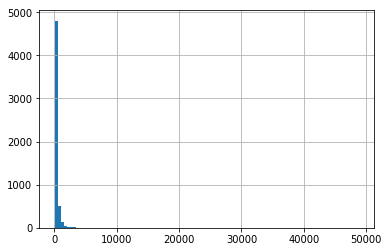

In [7]:
data['price'].hist(bins=100)

In [8]:
data['price'].describe()

count     5555.000000
mean       278.766157
std        842.215531
min          9.000000
25%         70.000000
50%        129.000000
75%        280.000000
max      48842.000000
Name: price, dtype: float64

In [9]:
data[data['price']==48842]

,Unnamed: 0,_id,access,accommodates,address,amenities,availability,bathrooms,bed_type,bedrooms,...,property_type,review_scores,reviews,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price
1982,1982,20275354,NaN,1,"{'street': 'Şişli, İstanbul, Turkey', 'suburb'...","['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Smoking...","{'availability_30': 0, 'availability_60': 0, '...",1.0,Real Bed,1.0,...,Apartment,{},[],NaN,Private room,NaN,our flat which is located in Sisli Bomonti jus...,We are new married couple.We have have one ful...,NaN,NaN


In [10]:
# drop this row
i = data[data['price']==48842].index
data.drop(i, inplace=True)

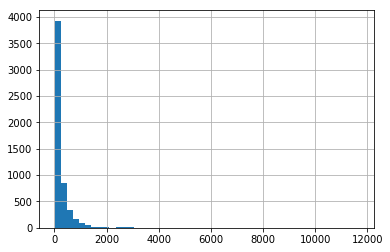

In [11]:
data['price'].hist(bins=50)

Still another outlier. Lets see why

In [12]:
data['price'].describe()

count     5554.000000
mean       270.022326
std        533.547676
min          9.000000
25%         70.000000
50%        129.000000
75%        280.000000
max      11681.000000
Name: price, dtype: float64

In [13]:
data[data['price']==11681].loc[863]['reviews']

"[{'_id': '96539746', 'date': datetime.datetime(2016, 8, 23, 4, 0), 'listing_id': '14644562', 'reviewer_id': '91413032', 'reviewer_name': 'Cheuk Wai', 'comments': 'The host canceled this reservation 6 days before arrival. This is an automated posting.'}]"

We can see from the reivew for this listing that is was an automated span posting so eliminate it

In [14]:
data[data['price']==11681].loc[3369]['reviews']

"[{'_id': '308703954', 'date': datetime.datetime(2018, 8, 17, 4, 0), 'listing_id': '27593455', 'reviewer_id': '48471824', 'reviewer_name': 'Lin', 'comments': '地理位置优越,往返机场A21,门到门'}, {'_id': '312647218', 'date': datetime.datetime(2018, 8, 24, 4, 0), 'listing_id': '27593455', 'reviewer_id': '85301073', 'reviewer_name': '妍', 'comments': '隔音差,隔壁打电话吵了一夜,房间有小虫子,不是蚊子,被咬了,潮湿,被褥有点不干净,地理位置倒是挺好的,价格不算性价比最高的'}, {'_id': '313120777', 'date': datetime.datetime(2018, 8, 25, 4, 0), 'listing_id': '27593455', 'reviewer_id': '143569984', 'reviewer_name': '效康', 'comments': '挺不错的'}, {'_id': '330735980', 'date': datetime.datetime(2018, 10, 1, 4, 0), 'listing_id': '27593455', 'reviewer_id': '55813414', 'reviewer_name': 'Jeffrey', 'comments': 'Good cheap place in Mong Kok. Everything was clean, but there was an odour coming from the bathroom'}, {'_id': '365999651', 'date': datetime.datetime(2019, 1, 2, 5, 0), 'listing_id': '27593455', 'reviewer_id': '60607093', 'reviewer_name': 'Adele', 'comments': 'Simple and b

We can see from the review in English that is was a 'Good and cheap place' so this pricing is obviously an error. Delete it too

In [15]:
i = data[data['price']==11681].index
data.drop(i, inplace=True)

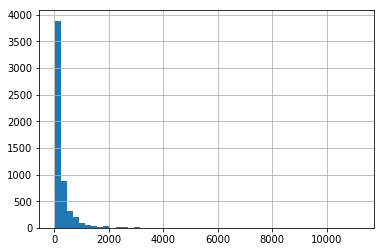

In [16]:
data['price'].hist(bins=50)

Filter for less than 4000$ price

In [17]:
data = data[data['price'] < 4000]

Lets check the distribution again

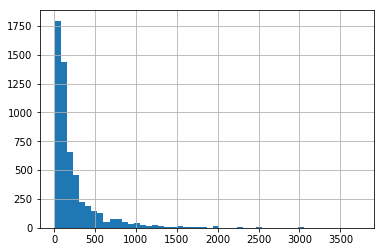

In [18]:
data['price'].hist(bins=50)

In [19]:

data['price'].describe()

count    5538.000000
mean      250.147346
std       357.000997
min         9.000000
25%        70.000000
50%       129.000000
75%       280.000000
max      3730.000000
Name: price, dtype: float64

In [20]:
data[data['price']==3730]

,Unnamed: 0,_id,access,accommodates,address,amenities,availability,bathrooms,bed_type,bedrooms,...,property_type,review_scores,reviews,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price
2369,2369,2301710,"TV a cabo (sky), wifi, cozinha completa, cama ...",8,"{'street': 'Rio, Rio de Janeiro, Brazil', 'sub...","['Cable TV', 'Air conditioning', 'Kitchen', 'P...","{'availability_30': 25, 'availability_60': 55,...",2.5,Real Bed,4.0,...,House,"{'review_scores_accuracy': 8, 'review_scores_c...","[{'_id': '14612042', 'date': datetime.datetime...",NaN,Entire home/apt,1865.0,"Casa na melhor quadra de ipanema, Rio de Janei...","Casa com 3 quartos, 1 suite, salão, lavabo, v...",Estação do metrô na Pça N. Sra da Paz na mesma...,NaN


In [21]:
data['images'].iloc[2369]

"{'thumbnail_url': '', 'medium_url': '', 'picture_url': 'https://a0.muscache.com/im/pictures/204d9434-7b0c-4180-b41d-e9fc97e6933a.jpg?aki_policy=large', 'xl_picture_url': ''}"

No way thats 3760 a night.  This must be a monthly rate mistakenly listed in the daily price.  Let delete that one

In [22]:
i = data[data['price']==3726].index
data.drop(i, inplace=True)

In [23]:
i = data[data['price']==3730].index
data.drop(i, inplace=True)

In [24]:
data[data['price']>1000]

,Unnamed: 0,_id,access,accommodates,address,amenities,availability,bathrooms,bed_type,bedrooms,...,property_type,review_scores,reviews,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price
100,100,10449328,Acesso livre pela casa. Permitido fumar.,11,"{'street': 'Rio de Janeiro, State of Rio de Ja...","['TV', 'Internet', 'Wifi', 'Air conditioning',...","{'availability_30': 30, 'availability_60': 60,...",7.0,Real Bed,4.0,...,House,{},[],NaN,Entire home/apt,NaN,"Piscina, gramado, acomada 8 pessoas em 4 suítes.","Casa em São Conrado, com vista para a floresta...",NaN,NaN
103,103,10295352,NaN,6,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","['Cable TV', 'Wifi', 'Air conditioning', 'Whee...","{'availability_30': 0, 'availability_60': 0, '...",3.0,Real Bed,3.0,...,Apartment,{},[],NaN,Entire home/apt,NaN,"In the heart of Ipanema, the apartment is very...",Fantastic apt for 6 people a block from the be...,Close to the subw Bus station in front of the ...,NaN
117,117,1066648,NaN,8,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...","{'availability_30': 23, 'availability_60': 53,...",5.0,Real Bed,6.0,...,House,{},[],NaN,Entire home/apt,NaN,"Built before the turn of the century, this ful...",A beautiful colonial mansion for office or res...,NaN,NaN
128,128,10839973,NaN,2,"{'street': 'Hong Kong, Kowloon, Hong Kong', 's...","['TV', 'Wifi', 'Air conditioning', 'Elevator',...","{'availability_30': 30, 'availability_60': 60,...",1.0,Real Bed,1.0,...,Apartment,{},[],NaN,Private room,NaN,NaN,我的房源適合情侶和獨自旅行的冒險家｡,NaN,NaN
132,132,10840938,NaN,5,"{'street': 'Hong Kong, Hong Kong Island, Hong ...","['TV', 'Cable TV', 'Wifi', 'Air conditioning',...","{'availability_30': 7, 'availability_60': 24, ...",1.5,Real Bed,3.0,...,Apartment,"{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '61277620', 'date': datetime.datetime...",NaN,Entire home/apt,1500.0,Its a classic central hong kong style building...,Welcome to stay in my 3bed apartment. Its a ra...,NaN,NaN
141,141,10893326,NaN,2,"{'street': 'Sheung Wan, Hong Kong Island, Hong...","['TV', 'Cable TV', 'Wifi', 'Air conditioning',...","{'availability_30': 0, 'availability_60': 0, '...",1.0,Real Bed,1.0,...,Apartment,"{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '64686084', 'date': datetime.datetime...",NaN,Entire home/apt,5000.0,NaN,We live in a beautiful and spacious one bedroo...,"The area is well served by minibuses, City Bus...",NaN
142,142,10816768,The building has a 24 hour doorman with key-le...,5,"{'street': 'Hong Kong, Hong Kong Island, Hong ...","['TV', 'Cable TV', 'Wifi', 'Air conditioning',...","{'availability_30': 4, 'availability_60': 10, ...",1.0,Real Bed,2.0,...,Apartment,"{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '192194362', 'date': datetime.datetim...",NaN,Entire home/apt,0.0,We will accommodate a maximum of 5 guests incl...,Bright and spacious two bedroom apartment loca...,The Airport Express direct from the airport ar...,7500.0
281,281,1176693,The entire apartment with all amenities is acc...,8,"{'street': 'Causeway Bay, Hong Kong', 'suburb'...","['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...","{'availability_30': 12, 'availability_60': 29,...",2.0,Real Bed,3.0,...,Apartment,"{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '5528473', 'date': datetime.datetime(...",NaN,Entire home/apt,1570.0,FACTS - located in the heart of one of Hong Ko...,Location is OUTSTANDING as MTR Causeway BAY is...,HOW TO GET TO CAUSEWAY BAY: By Public transpor...,NaN
311,311,11948705,"Bed linen, towels, kitchen appliances, kitchen...",6,"{'street': 'Rio de Janeiro, RJ, Brazil', 'subu...","['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...","{'availability_30': 30, 'availability_60': 60,...",4.0,Real Bed,4.0,...,Apartment,{},[],NaN,Entire home/apt,NaN,"The location, size and comfort.","Our apt. is comfortable, spacious and located ...",Close to the subway and easily acces

In [25]:
data[data['price']>1000]['listing_url']

100     https://www.airbnb.com/rooms/10449328
103     https://www.airbnb.com/rooms/10295352
117      https://www.airbnb.com/rooms/1066648
128     https://www.airbnb.com/rooms/10839973
132     https://www.airbnb.com/rooms/10840938
141     https://www.airbnb.com/rooms/10893326
142     https://www.airbnb.com/rooms/10816768
281      https://www.airbnb.com/rooms/1176693
311     https://www.airbnb.com/rooms/11948705
312     https://www.airbnb.com/rooms/11963985
347     https://www.airbnb.com/rooms/12188649
355     https://www.airbnb.com/rooms/12104860
377      https://www.airbnb.com/rooms/1229847
387     https://www.airbnb.com/rooms/12068078
396     https://www.airbnb.com/rooms/12270044
408     https://www.airbnb.com/rooms/12452082
415     https://www.airbnb.com/rooms/12591225
440     https://www.airbnb.com/rooms/12742947
471     https://www.airbnb.com/rooms/13218264
474     https://www.airbnb.com/rooms/12923454
481     https://www.airbnb.com/rooms/13316078
494     https://www.airbnb.com/roo

It looks like these are mostly in the Ipanema area of Rio de Janiero, an expensive area, and in Hong Kong (no suprise there)

## Missing values

In [26]:
# Fill NaN for cleaning_fee to 0
data['cleaning_fee'].fillna(0, inplace=True)

In [27]:
data['security_deposit'].fillna(0, inplace=True)

In [28]:
data['review_scores'].fillna('None', inplace=True)

In [29]:
data['access'].fillna('None', inplace=True)

The 'bathrooms','bed_type','bedrooms','beds' we can just fill the missing values with the mode

In [30]:
cols = ['bathrooms','bed_type','bedrooms','beds']
data[cols] = data[cols].fillna(data[cols].mode().iloc[0])

In [31]:
data['description'] = data['description'].fillna('None')

### Geography 

In [32]:
def get_city(x):
    result = re.search("'market':(.*), 'country'", x)
    return result.group(1)

def get_state(x):
    return x.split(",")[1]

def get_country(x):
    result = re.search("'country':(.*), 'country_code'", x)
    return result.group(1)

def get_suburb(x):
    result = re.search("'suburb':(.*), 'government_area'", x)
    return result.group(1)

def get_government_area(x):
    result = re.search("'government_area':(.*), 'market'", x)
    return result.group(1)

In [33]:
data['state'] = data['address'].apply(get_state)

In [34]:
data['city'] = data['address'].apply(get_city)

In [35]:
data['country'] = data['address'].apply(get_country)

In [36]:
data['suburb'] = data['address'].apply(get_suburb)

In [37]:
data['government_area'] = data['address'].apply(get_government_area)

### Country and Prices 

Airbnb uses a practice called Dynamic Currency Conversion to show your price to you in e.g. USD. 

In [38]:
# what is the average price per night per country
means = data.groupby('country')['price'].mean()

In [39]:
means

country
 'Australia'        197.806557
 'Brazil'           449.613065
 'Canada'           100.117103
 'China'            405.368421
 'Hong Kong'        688.683502
 'Portugal'          69.181982
 'Spain'            100.826224
 'Turkey'           270.614916
 'United States'    185.769231
Name: price, dtype: float64

[Text(0, 0, " 'United States'"),
 Text(0, 0, " 'Brazil'"),
 Text(0, 0, " 'Canada'"),
 Text(0, 0, " 'Portugal'"),
 Text(0, 0, " 'Hong Kong'"),
 Text(0, 0, " 'Turkey'"),
 Text(0, 0, " 'Spain'"),
 Text(0, 0, " 'Australia'"),
 Text(0, 0, " 'China'")]

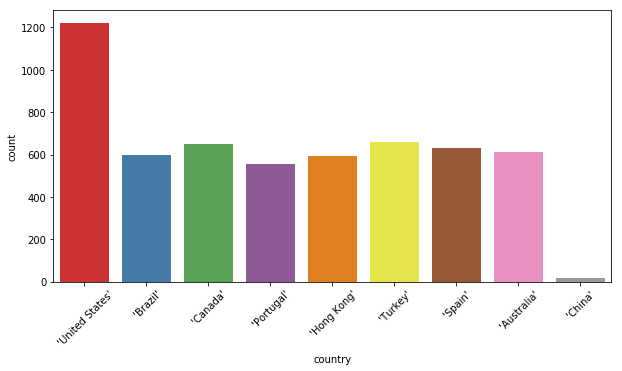

In [42]:
# How many listings per country

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x='country',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

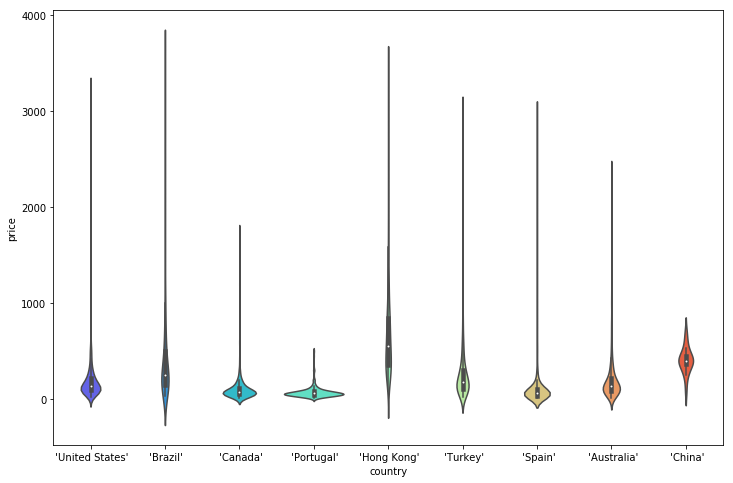

In [43]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(x="country", y="price", ax=ax, data=data,palette='rainbow')

### Reviews

In [44]:
def get_review_scores_rating(x):
    if x != "{}":
        return int(x.split(",")[-1].split(":")[1][-4:-1])
    else:
        return 0

In [45]:
data['review_scores_rating'] = data['review_scores'].apply(get_review_scores_rating)

In [46]:
data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace=True)

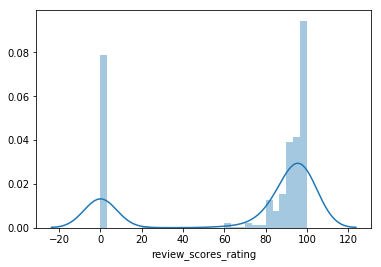

In [47]:
sns.distplot(data['review_scores_rating'], bins=30)

## Reviews

### Does more reviews trend with higher price 

In [48]:
print(data['reviews'].iloc[0])

[{'_id': '4351675', 'date': datetime.datetime(2013, 4, 29, 4, 0), 'listing_id': '1003530', 'reviewer_id': '3708459', 'reviewer_name': 'Josh', 'comments': "i had a really pleasant stay at greta's place. the location is super convenient -- and the area is fun, with lots of hidden gems. the apartment was comfortable and charming. greta was accommodating and hospitable and left some great cupcakes in the fridge. i give this place a strong endorsement."}, {'_id': '4848277', 'date': datetime.datetime(2013, 5, 28, 4, 0), 'listing_id': '1003530', 'reviewer_id': '4609491', 'reviewer_name': 'Ralf', 'comments': 'Greta has been a great host, and her apartment a great place to stay. Perfectly located for our adventures around NYC, it is a place full of character and, as I see it, a very authentic NY Apartment that makes you feel at home imediately. Great neighbourhood, great infrastructure around the apartment block. Very good for a perfect stay.'}, {'_id': '5094175', 'date': datetime.datetime(2013

In [49]:
data['reviews_length'] = data['reviews'].apply(len)

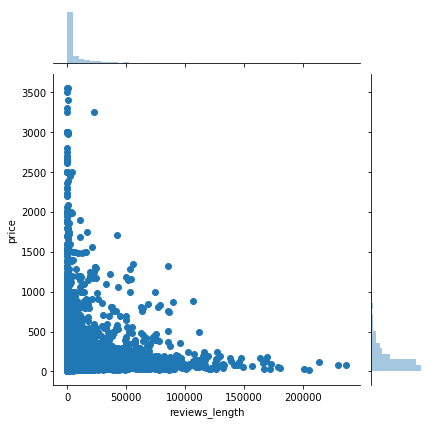

In [50]:
sns.jointplot(data=data, x='reviews_length', y='price', kind='scatter')

In [51]:
#data[data['reviews_length'] > 100000]['reviews'].loc[149]

Wow. Some of these reviews are enough for a book! However, the number of reviews a listing has no correlation with price.  Actually is seems that most of the most expensive properties

In [52]:
data.drop('reviews_length',axis=1, inplace=True)

Lets just make a feature that says if there was a review or not

In [53]:
data['has_reviews'] = data['reviews'].apply(lambda x: 0 if x == '[]' else 1)

Text(0.5, 0, 'Price')

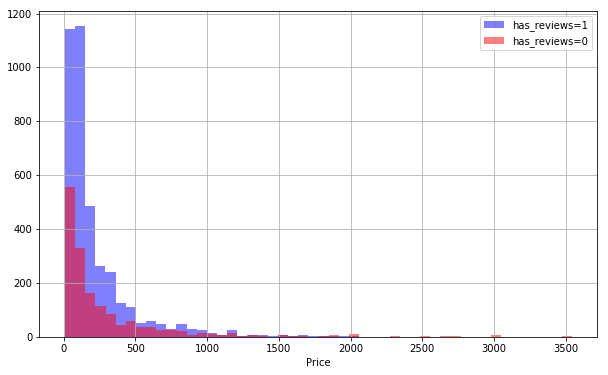

In [54]:
plt.figure(figsize=(10,6))
data[data['has_reviews']==1]['price'].hist(alpha=0.5,color='blue',
                                              bins=50,label='has_reviews=1')
data[data['has_reviews']==0]['price'].hist(alpha=0.5,color='red',
                                              bins=50,label='has_reviews=0')
plt.legend()
plt.xlabel('Price')

Those listings that have reivews have a slightly higher price distribution than those without.  But those with the highest price listings do not have reviews. Interesting

In [55]:
def get_comments(x):
    comments = []
    if x != '[]':
        entries = x.split("}, {")
        for entry in entries:
            pattern = "'comments':(.*)"
            try:
                comments = [(re.search(pattern, entry).group(1)).replace("\\r\\n", "") for entry in entries]
            except:
                print("oops")
    else:
        x = []
    return comments

In [56]:
data['comments'] = data['reviews'].apply(get_comments)

oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops


In [57]:
data['comments'][0]

[' "i had a really pleasant stay at greta\'s place. the location is super convenient -- and the area is fun, with lots of hidden gems. the apartment was comfortable and charming. greta was accommodating and hospitable and left some great cupcakes in the fridge. i give this place a strong endorsement."',
 " 'Greta has been a great host, and her apartment a great place to stay. Perfectly located for our adventures around NYC, it is a place full of character and, as I see it, a very authentic NY Apartment that makes you feel at home imediately. Great neighbourhood, great infrastructure around the apartment block. Very good for a perfect stay.'",
 ' "Greta was wonderful. We arrived late at night and she made sure we were able to get in. We also had to transfer to a hotel for work, and she allowed us to keep our belongings there until 3 so we wouldn\'t be carting our luggage until we needed to. The apartment was clean and large and in a wonderful neighborhood. She had lists and menus of pla

In [58]:
# Remove the '/' to clean it up
def remove_slash(x):
    for item in x:
        item.replace('/', '')
        return x

In [59]:
data['comments'] = data['comments'].apply(remove_slash)

In [60]:
data.drop('reviews', axis=1, inplace=True)

## Amenities 

In [61]:
import json
import ast
import sys, json

# turn this string objct to list with json.loads
def get_amenities(x):
    struct = {}
    try:
        try: #try parsing to dict
            dataform = str(x).strip("'<>() ").replace('\'', '\"')
            struct = json.loads(dataform)
            return struct
        except:
            print(repr(resonse_json))
    except:
        print("fine")

In [62]:
data['amenities_list'] = data['amenities'].apply(get_amenities)

fine


In [63]:
data.drop('amenities', axis=1, inplace=True)

In [64]:
def jsonify(x):
    if x != {}:
        return json.loads(x)
    else:
        return "{}"

In [65]:
#def get_eval(x):
#    return eval(x)

Create feature, 'has_notes' that is binary either 1 or 0 if there are notes or not from the owner.

In [66]:
data['has_notes'] = data['notes'].apply(lambda x: 1 if type(x) == str else 0)

In [67]:
data.drop('notes', axis=1, inplace=True)




### Create length features that create a numeric value for the length of texts columns like notes, reviews, description

In [68]:
data['access_length'] = data['access'].apply(len)

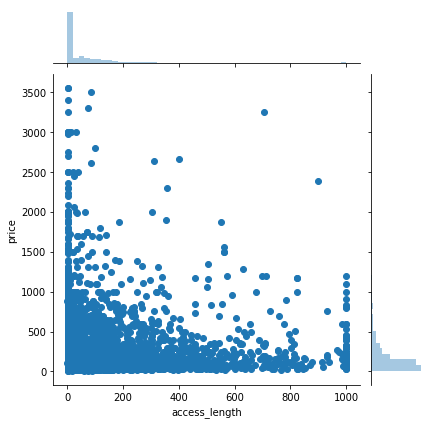

In [69]:
#plot access_length against price
sns.jointplot(data=data, x='access_length', y='price', kind='scatter')

In [70]:
data.drop('weekly_price', axis=1, inplace=True)

In [71]:
#data.drop("images", axis=1, inplace=True)

In [72]:
data[data['price']>1000]

,Unnamed: 0,_id,access,accommodates,address,availability,bathrooms,bed_type,bedrooms,beds,...,city,country,suburb,government_area,review_scores_rating,has_reviews,comments,amenities_list,has_notes,access_length
100,100,10449328,Acesso livre pela casa. Permitido fumar.,11,"{'street': 'Rio de Janeiro, State of Rio de Ja...","{'availability_30': 30, 'availability_60': 60,...",7.0,Real Bed,4.0,8.0,...,'Rio De Janeiro','Brazil','São Conrado','São Conrado',0,0,None,"[TV, Internet, Wifi, Air conditioning, Pool, K...",0,40
103,103,10295352,None,6,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 0, 'availability_60': 0, '...",3.0,Real Bed,3.0,4.0,...,'Rio De Janeiro','Brazil','Ipanema','Ipanema',0,0,None,"[Cable TV, Wifi, Air conditioning, Wheelchair ...",0,4
117,117,1066648,None,8,"{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 23, 'availability_60': 53,...",5.0,Real Bed,6.0,6.0,...,'Rio De Janeiro','Brazil','Santa Teresa','Santa Teresa',0,0,None,"[TV, Cable TV, Internet, Wifi, Air conditionin...",0,4
128,128,10839973,None,2,"{'street': 'Hong Kong, Kowloon, Hong Kong', 's...","{'availability_30': 30, 'availability_60': 60,...",1.0,Real Bed,1.0,1.0,...,'Hong Kong','Hong Kong','Yau Tsim Mong','Yau Tsim Mong',0,0,None,"[TV, Wifi, Air conditioning, Elevator, Smoke d...",0,4
132,132,10840938,None,5,"{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 7, 'availability_60': 24, ...",1.5,Real Bed,3.0,3.0,...,'Hong Kong','Hong Kong','Sheung Wan','Central & Western',87,1,[ 'Melanie was an amazing and friendly host! S...,"[TV, Cable TV, Wifi, Air conditioning, Kitchen...",1,4
141,141,10893326,None,2,"{'street': 'Sheung Wan, Hong Kong Island, Hong...","{'availability_30': 0, 'availability_60': 0, '...",1.0,Real Bed,1.0,1.0,...,'Hong Kong','Hong Kong','Central & Western District','Central & Western',98,1,"[ ""I had a wonderful stay at Maria's. I have...","[TV, Cable TV, Wifi, Air conditioning, Kitchen...",0,4
142,142,10816768,The building has a 24 hour doorman with key-le...,5,"{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 4, 'availability_60': 10, ...",1.0,Real Bed,2.0,3.0,...,'Hong Kong','Hong Kong','Mid-Levels','Central & Western',99,1,"[ ""This place is a gem! It's in the heart of ...","[TV, Cable TV, Wifi, Air conditioning, Kitchen...",1,140
281,281,1176693,The entire apartment with all amenities is acc...,8,"{'street': 'Causeway Bay, Hong Kong', 'suburb'...","{'availability_30': 12, 'availability_60': 29,...",2.0,Real Bed,3.0,4.0,...,'Hong Kong','Hong Kong','Wan Chai District','Wan Chai',83,1,[ 'Susan and her team are fabulous. They rece...,"[TV, Cable TV, Internet, Wifi, Air conditionin...",1,562
311,311,11948705,"Bed linen, towels, kitchen appliances, kitchen...",6,"{'street': 'Rio de Janeiro, RJ, Brazil', 'subu...","{'availability_30': 30, 'availability_60': 60,...",4.0,Real Bed,4.0,4.0,...,'Rio De Janeiro','Brazil','Copacabana','Copacabana',0,0,None,"[TV, Cable TV, Internet, Wifi, Air conditionin...",1,87
312,312,11963985,None,8,"{'street': 'Rio de Janeiro, RJ, Brazil', 'subu...","{'availability_30': 27, 'availability_60': 57,...",7.0,Real Bed,4.0,4.0,...,'Rio De Janeiro','Brazil','Recreio dos Bandeirantes','Recreio dos Bandeirantes',0,0,None,"[Internet, Wifi, Air conditioning, Pool, Kitch...",1,4


# Removing worthless columns

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5536 entries, 0 to 5554
Data columns (total 50 columns):
Unnamed: 0               5536 non-null int64
_id                      5536 non-null int64
access                   5536 non-null object
accommodates             5536 non-null int64
address                  5536 non-null object
availability             5536 non-null object
bathrooms                5536 non-null float64
bed_type                 5536 non-null object
bedrooms                 5536 non-null float64
beds                     5536 non-null float64
calendar_last_scraped    5536 non-null object
cancellation_policy      5536 non-null object
cleaning_fee             5536 non-null float64
description              5536 non-null object
extra_people             5536 non-null float64
first_review             4161 non-null object
guests_included          5536 non-null int64
host                     5536 non-null object
house_rules              3266 non-null object
images            

Lets get a better look at these columns in the middle, pandas df view wont show up those

In [74]:
data[data['reviews_per_month']!= 'Nan'].iloc[:,15:30]

C:\Users\Ben\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,first_review,guests_included,host,house_rules,images,interaction,last_review,last_scraped,listing_url,maximum_nights,minimum_nights,monthly_price,name,neighborhood_overview,number_of_reviews
0,2013-04-29 04:00:00,1,"{'host_id': '454250', 'host_url': 'https://www...",No smoking is permitted in the apartment. All ...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",NaN,2018-08-12 04:00:00,2019-03-07 05:00:00,https://www.airbnb.com/rooms/1003530,360,12,NaN,New York City - Upper West Side Apt,Great neighborhood - many terrific restaurants...,70
1,2013-05-24 04:00:00,1,"{'host_id': '5448114', 'host_url': 'https://ww...",The general welfare and well being of all the ...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","We try our best at creating, simple responsive...",2019-02-07 05:00:00,2019-03-06 05:00:00,https://www.airbnb.com/rooms/1001265,365,3,2150.0,Ocean View Waikiki Marina w/prkg,You can breath ocean as well as aloha.,96
2,2016-02-10 05:00:00,4,"{'host_id': '51326285', 'host_url': 'https://w...",NaN,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","Sou geógrafa, gosto de arte e cultura. Moro ne...",2016-02-10 05:00:00,2019-02-11 05:00:00,https://www.airbnb.com/rooms/10051164,1125,2,NaN,Catete's Colonial Big Hause Room B,"A Grande Morada situa-se no Bairro do Catete, ...",1
3,NaN,1,"{'host_id': '1282196', 'host_url': 'https://ww...",I just hope the guests treat the space as they...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","I´ll be happy to help you with any doubts, tip...",NaN,2019-02-11 05:00:00,https://www.airbnb.com/rooms/10009999,1125,2,4849.0,Horto flat with small garden,This charming ground floor flat is located in ...,0
4,2016-01-18 05:00:00,3,"{'host_id': '51530266', 'host_url': 'https://w...",Entreguem o imóvel conforme receberam e respei...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",Contact telephone numbers if needed: Valeria (...,2019-01-28 05:00:00,2019-02-11 05:00:00,https://www.airbnb.com/rooms/10038496,75,3,NaN,Copacabana Apartment Posto 6,Copacabana in the South zone is the district t...,70
5,2016-01-31 05:00:00,1,"{'host_id': '11275734', 'host_url': 'https://w...",NaN,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",NaN,2016-01-31 05:00:00,2019-03-06 05:00:00,https://www.airbnb.com/rooms/10021707,1125,14,NaN,Private Room in Bushwick,NaN,1
6,NaN,1,"{'host_id': '7140229', 'host_url': 'https://ww...",Non fumeur Respect des voisins Respect des bie...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",Une amie sera disponible en cas de besoin.,NaN,2019-03-11 04:00:00,https://www.airbnb.com/rooms/10059244,1125,2,NaN,Ligne verte - à 15 min de métro du centre ville.,L'appartement se trouve à 4 minutes de marche ...,0
7,NaN,1,"{'host_id': '9036477', 'host_url': 'https://ww...",Merci de respecter ce lieu de vie.,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",N'hésitez pas à m'écrire pour toute demande de...,NaN,2019-03-11 04:00:00,https://www.airbnb.com/rooms/10066928,1125,1,NaN,3 chambres au coeur du Plateau,"L'appartement se situe au coeur du Plateau, do...",0
8,2016-01-02 05:00:00,1,"{'host_id': '27518920', 'host_url': 'https://w...",. No smoking inside the apartment. . Is forbid...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",I`am always avaiable with for my guests.,2019-02-09 05:00:00,2019-02-16 05:00:00,https://www.airbnb.com/rooms/10083468,1125,2,NaN,Be Happy in Porto,"""Be happy in Porto"" offers a quality accommod...",178
9,2016-01-03 05:00:00,1,"{'host_id': '47554473', 'host_url': 'https://w...",Guest must leave a copy of credit card with fr...,"{'thumbnail_url': '', 'medium_url': '', 'pictu...",NaN,2018-02-18 05:00:00,2019-03-07 05:00:00,https://www.airbnb.com/rooms/10057826,1125,3,NaN,Deluxe Loft Suite,Greenpoint is an artsy Brooklyn neighborhood f...,5


We can drop id, first_review, host, last_review, last_scraped, and listing url becuase they are really just sort of index values that dont hold much value as to the actual place.  Perhaps there is a really bad host to watch out for but this really just adds noise to our model.  'name' and 'neighborhood_overview' are subjectve comments that are biased to the point of view of the host so they should be dropped.  We can however change them to a binary as to whether they exist or not and that will take care of the missing values.

In [75]:
data.drop(['_id','first_review', 'host','last_review','last_scraped','listing_url'], axis=1, inplace=True)

In [76]:
data['has_name'] = data['name'].apply(lambda x: 1 if type(x) == str else 0)

In [77]:
data['has_neighborhood_overview']= data['neighborhood_overview'].apply(lambda x: 1 if type(x) == str else 0)

Monthly price has too many nulls

In [78]:
type(data['neighborhood_overview'][0])

str

In [79]:
data.drop('monthly_price', axis=1, inplace=True)

Text(0, 0.5, 'Count')

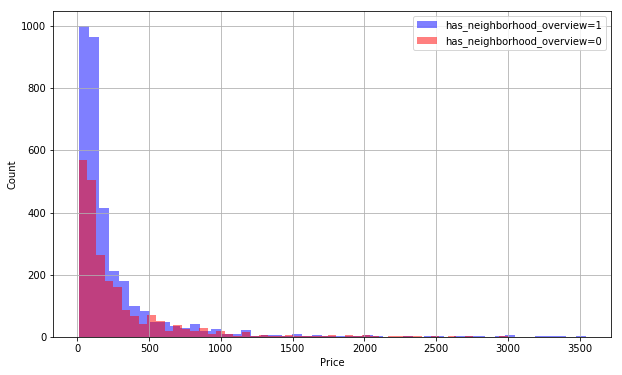

In [80]:
plt.figure(figsize=(10,6))
data[data['has_neighborhood_overview']==1]['price'].hist(alpha=0.5,color='blue',
                                              bins=50,label='has_neighborhood_overview=1')
data[data['has_neighborhood_overview']==0]['price'].hist(alpha=0.5,color='red',
                                              bins=50,label='has_neighborhood_overview=0')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Count')

In [81]:
data['description'] = data['description'].fillna('None')

## Availability

In [82]:

def get_30(x):
    x = int(x[20:21])
    return x

In [83]:
data['availability_30'] = data['availability'].apply(get_30)

In [84]:
type(data['availability_30'][0])

numpy.int64

In [85]:
def get_60(x):
    result = re.search("'availability_60':(.*), 'availability_90'", x)
    return int(result.group(1))

In [86]:
data['availability_60'] = data['availability'].apply(get_60)

In [87]:
def get_90(x):
    result = re.search("'availability_90':(.*), 'availability_365'", x)
    return int(result.group(1))

In [88]:
data['availability_90'] = data['availability'].apply(get_90)

In [89]:
data['availability'][0]

"{'availability_30': 0, 'availability_60': 0, 'availability_90': 0, 'availability_365': 93}"

In [90]:
def get_365(x):
    result = re.search("'availability_365':(.*)}", x)
    return int(result.group(1))

In [91]:
data['availability_365'] = data['availability'].apply(get_365)

In [92]:
data.drop('availability', axis=1, inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5536 entries, 0 to 5554
Data columns (total 48 columns):
Unnamed: 0                   5536 non-null int64
access                       5536 non-null object
accommodates                 5536 non-null int64
address                      5536 non-null object
bathrooms                    5536 non-null float64
bed_type                     5536 non-null object
bedrooms                     5536 non-null float64
beds                         5536 non-null float64
calendar_last_scraped        5536 non-null object
cancellation_policy          5536 non-null object
cleaning_fee                 5536 non-null float64
description                  5536 non-null object
extra_people                 5536 non-null float64
guests_included              5536 non-null int64
house_rules                  3266 non-null object
images                       5536 non-null object
interaction                  3070 non-null object
maximum_nights               5536 non-nul

In [94]:
data.drop('name', axis=1, inplace=True )

In [95]:
data.drop('reviews_per_month', axis=1, inplace=True)

In [96]:
data['house_rules']

0       No smoking is permitted in the apartment. All ...
1       The general welfare and well being of all the ...
2                                                     NaN
3       I just hope the guests treat the space as they...
4       Entreguem o imóvel conforme receberam e respei...
5                                                     NaN
6       Non fumeur Respect des voisins Respect des bie...
7                      Merci de respecter ce lieu de vie.
8       . No smoking inside the apartment. . Is forbid...
9       Guest must leave a copy of credit card with fr...
10                                                    NaN
11                                                    NaN
12                            Make the house your home...
13      Be and feel like your own home, with total res...
14                                                    NaN
15                                                    NaN
16                                                    NaN
17            

In [97]:
data.to_csv(r"C:\Users\Ben\Documents\Fairbnb\data\clean_data.csv")